GARCÍA PACHECO ANDRÉS ESTEBAN

KU ARGAEZ LUIS DANIEL

MENDOZA RAMIREZ ANGEL ALBERTO

NIEVES VICTORIA RODOLFO ANTONIO


# Titulo

# Definición del Problema y Recolección de Datos


## Problemática

La problematica tratada en este trabajo, es encontrar la tendencia de los nacimiento, asi como defunciones de los municipios del estado de Yucatan, de esta manera tener ubicados los municipios que presenten altas tasas ya sea de natalidad, como de defunciones, para que si se llegase a nececitar, se puedan ubicar los lugares donde se requiera alguna mejora de la salud publica, seguridad, o nivel de vida.

## Objetivos

El objetivo en este trabajo, es usar Clustering para encontrar grupos de municipios con mayor cantidad de nacimientos y defunciones en el estado, de esa manera podremos recomendar a dichos municipios, lo que llegen a tener de necesidad.

## Metodología

La metodología a trabajar para los datos recopilados es SEMMA, puesto que cumple con los requerimientos necesarios para poder procesar los datos de una manera ágil, puesto que nos ayudará a descubrir patrones, como herramientas de apoyo a partir de datos significativos.

## Datos

Los conjuntos de datos que utilizaremos (natalidad, mortalidad) fueron obtenidos en: https://www.inegi.org.mx/app/descarga/, para encontrar estos datos en la sección entidades federativas seleccionar Yucatán, después en el cuadro de búsqueda ingresar los temas, estos datos fueron recolectados en el mes de Marzo del año 2021.

#  Análisis Exploratorio de Datos


## Descripción de las variables

In [1]:
import pandas as pd

mortalidad = pd.read_csv("evmor_31_valor.csv")
mortalidad

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,31,Yucatán,0,Estatal,1002000030,Defunciones generales,1994,7794.0,Defunciones
1,31,Yucatán,0,Estatal,1002000030,Defunciones generales,1995,8139.0,Defunciones
2,31,Yucatán,0,Estatal,1002000030,Defunciones generales,1996,8094.0,Defunciones
3,31,Yucatán,0,Estatal,1002000030,Defunciones generales,1997,7988.0,Defunciones
4,31,Yucatán,0,Estatal,1002000030,Defunciones generales,1998,8318.0,Defunciones
...,...,...,...,...,...,...,...,...,...
21670,31,Yucatán,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,2014,0.0,Defunciones
21671,31,Yucatán,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,2015,0.0,Defunciones
21672,31,Yucatán,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,2016,0.0,Defunciones
21673,31,Yucatán,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,2017,0.0,Defunciones


Como se menciono en el plantamiento del problema, el objetivo de nuestro trabajo es encontrar municipios, por lo que los datos generales no son necesarios.

In [2]:
mortalidad = mortalidad.loc[(mortalidad["indicador"] == "Defunciones generales") & (mortalidad["cve_municipio"] != 0)]
mortalidad = mortalidad.reset_index(drop=True)
mortalidad

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,31,Yucatán,1,Abalá,1002000030,Defunciones generales,1994,32.0,Defunciones
1,31,Yucatán,1,Abalá,1002000030,Defunciones generales,1995,37.0,Defunciones
2,31,Yucatán,1,Abalá,1002000030,Defunciones generales,1996,39.0,Defunciones
3,31,Yucatán,1,Abalá,1002000030,Defunciones generales,1997,39.0,Defunciones
4,31,Yucatán,1,Abalá,1002000030,Defunciones generales,1998,12.0,Defunciones
...,...,...,...,...,...,...,...,...,...
2670,31,Yucatán,996,No especificado,1002000030,Defunciones generales,2014,7.0,Defunciones
2671,31,Yucatán,996,No especificado,1002000030,Defunciones generales,2015,9.0,Defunciones
2672,31,Yucatán,996,No especificado,1002000030,Defunciones generales,2016,13.0,Defunciones
2673,31,Yucatán,996,No especificado,1002000030,Defunciones generales,2017,18.0,Defunciones


## Variables de Mortalidad
__cve_entidad__ Es el numero del Estado en el pais

__desc_entidad__ Es el nombre del Estado en el pais

__cve_municipio__ Es el numero del municipio en el Estado

__id_indicador__ Es el identificador del indicador

__indicador__ Es el indicador de la defuncion.

__año__ El año en el que fue capturado el indicador

__valor__ La cantidad de datos registrador del indicador en el año

__unidad_medida__ unidad de medida (defunciones o porcentaje)

In [3]:
natalidad = pd.read_csv("natalidad_31.csv")
natalidad

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,1990,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,unidad_medida
0,31,Yucatán,0,Estatal,1002000013,Promedio de hijos nacidos vivos de las mujeres...,NaN,NaN,ND,NaN,...,2.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Promedio
1,31,Yucatán,0,Estatal,1002000026,Nacimientos,NaN,41207.0,40329,39228.0,...,37703.00,36860.0,36427.0,38588.0,37579.0,37117.000000,35381.0,35017.0,35158.0,Nacimientos
2,31,Yucatán,0,Estatal,1002000027,Nacimientos hombres,NaN,20892.0,20624,19993.0,...,19072.00,18672.0,18359.0,19700.0,18978.0,18780.000000,18067.0,17917.0,17996.0,Nacimientos
3,31,Yucatán,0,Estatal,1002000028,Nacimientos mujeres,NaN,20315.0,19705,19235.0,...,18631.00,18187.0,18067.0,18888.0,18600.0,18336.000000,17314.0,17100.0,17162.0,Nacimientos
4,31,Yucatán,0,Estatal,1002000029,Nacimientos de sexo no especificado,NaN,0.0,0,0.0,...,0.00,1.0,1.0,0.0,1.0,1.000000,0.0,0.0,0.0,Nacimientos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,31,Yucatán,106,Yobaín,6207019036,Promedio de hijos nacidos vivos de las mujeres...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.673546,NaN,NaN,NaN,Promedio
655,31,Yucatán,996,No especificado,1002000026,Nacimientos,NaN,1.0,2,4.0,...,0.00,0.0,1.0,0.0,1.0,3.000000,11.0,3.0,3.0,Nacimientos
656,31,Yucatán,996,No especificado,1002000027,Nacimientos hombres,NaN,1.0,1,3.0,...,0.00,0.0,1.0,0.0,1.0,3.000000,10.0,1.0,2.0,Nacimientos
657,31,Yucatán,996,No especificado,1002000028,Nacimientos mujeres,NaN,0.0,1,1.0,...,0.00,0.0,0.0,0.0,0.0,0.000000,1.0,2.0,1.0,Nacimientos


In [4]:

natalidad = natalidad.loc[(natalidad["indicador"] == "Nacimientos") & (natalidad["desc_municipio"] != "Estatal") ]
natalidad = pd.melt(natalidad,id_vars = ["cve_entidad","desc_entidad", "cve_municipio","desc_municipio","id_indicador","indicador","unidad_medida"],var_name ="año",value_name = "nacimientos")
natalidad = natalidad.loc[natalidad["año"] != "nacimientos"]
natalidad


,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,unidad_medida,año,nacimientos
0,31,Yucatán,1,Abalá,1002000026,Nacimientos,Nacimientos,1990,NaN
1,31,Yucatán,2,Acanceh,1002000026,Nacimientos,Nacimientos,1990,NaN
2,31,Yucatán,3,Akil,1002000026,Nacimientos,Nacimientos,1990,NaN
3,31,Yucatán,4,Baca,1002000026,Nacimientos,Nacimientos,1990,NaN
4,31,Yucatán,5,Bokobá,1002000026,Nacimientos,Nacimientos,1990,NaN
...,...,...,...,...,...,...,...,...,...
2777,31,Yucatán,103,Xocchel,1002000026,Nacimientos,Nacimientos,2018,79
2778,31,Yucatán,104,Yaxcabá,1002000026,Nacimientos,Nacimientos,2018,340
2779,31,Yucatán,105,Yaxkukul,1002000026,Nacimientos,Nacimientos,2018,60
2780,31,Yucatán,106,Yobaín,1002000026,Nacimientos,Nacimientos,2018,23


## Variables Natalidad

__cve_entidad__ Es el numero del Estado en el pais

__desc_entidad__ Es el nombre del Estado en el pais

__cve_municipio__ Es el numero del municipio en el Estado

__id_indicador__ Es el identificador del indicador

__indicador__ Es el indicador de la defuncion.

__unidad_medida__ unidad de medida (defunciones o porcentaje)

__año__ El año en el que fue capturado el indicador

__valor__ La cantidad de datos registrados en ese año 

## Análisis Univariado

### Técnicas de Estadísticas Descriptivas

A continuación procederemos a encontrar las medidas de tendencia central de los valores de la columna valor de la tabla de mortalidad, está de más mencionar que son los datos de muertes generales por municipios.

In [5]:
#Mortalidad
# Calculo de la media
print("La media de defunciones en los municipios del estado es:")
print(mortalidad.mean(),"\n")

# calculo de la mediana
print("La mediana de defunciones en los municipios del estado es:")
print(mortalidad.median(),"\n")

#calculo de la moda
print("La moda de defunciones en los municipios del estado es:")
print(mortalidad.valor.mode())

La media de defunciones en los municipios del estado es:
cve_entidad      3.100000e+01
cve_municipio    6.230841e+01
id_indicador     1.002000e+09
año              2.006000e+03
valor            9.292037e+01
dtype: float64 

La mediana de defunciones en los municipios del estado es:
cve_entidad      3.100000e+01
cve_municipio    5.400000e+01
id_indicador     1.002000e+09
año              2.006000e+03
valor            2.800000e+01
dtype: float64 

La moda de defunciones en los municipios del estado es:
0    18.0
dtype: float64


Al realizar un análisis univariado con los datos de la tabla de Mortalidad se puede realizar una media aritmética para datos no agrupados para las 5 columnas, de las cuales las únicas redundantes son las columnas de "año" y "valor" puesto que su relación es proporcional al análisis requerido.

De igual forma tenemos la mediana de la de los datos de cada columna, sin embargo las únicas redundantes para nosotros son "año" y "valor" por los motivos previamente expuestos.

Al momento de realizar la moda se puede observar que nos dió 18, eso indica que la mayoría de los municipios tuvieron 18 defunciones.

Al momento de encontrar una relación entre los datos se puede notar a simple vista que poseemos una distribución con una asimetría positiva puesto que si se ordena la media, mediana y moda podemos de menor a mayor se puede apreciar que en todos los casos la moda es la mas pequeña, seguido de la mediana y la media aritmética.

In [6]:
# Natalidad
natalidad["año"] = natalidad["año"].astype(int)
natalidad["nacimientos"] = natalidad["nacimientos"].astype(float)
# Calculo de la media
print("La media de los datos de natalidad son: \n")
print(natalidad.mean(),"\n")

# calculo de la mediana
print("La mediana de los datos de natalidad son: \n")
print(natalidad.median(),"\n")

#calculo de la moda
print("La moda de los años: \n")
print(natalidad.nacimientos.mode())


La media de los datos de natalidad son: 

cve_entidad      3.100000e+01
cve_municipio    6.230841e+01
id_indicador     1.002000e+09
año              2.005385e+03
nacimientos      3.511611e+02
dtype: float64 

La mediana de los datos de natalidad son: 

cve_entidad      3.100000e+01
cve_municipio    5.400000e+01
id_indicador     1.002000e+09
año              2.005500e+03
nacimientos      1.040000e+02
dtype: float64 

La moda de los años: 

0    80.0
dtype: float64


Al realizar un análisis univariado con los datos de la tabla de Natalidad se puede realizar una media aritmética para datos no agrupados para las 5 columnas, de las cuales las únicas redundantes son las columnas de "año" y "valor" puesto que su relación es proporcional al análisis requerido.

De igual forma tenemos la mediana de la de los datos de cada columna, sin embargo las únicas redundantes para nosotros son "año" y "valor" por los motivos previamente expuestos.

Al momento de realizar la moda se puede observar que el dato que mas se repite es el 80.

Al momento de encontrar una relación entre los datos se puede notar a simple vista que los datos no corresponden a ningún tipo de distribución en particular, puesto que en todos los casos la moda es la mas pequeña, seguida por la media y por último la mediana.

__Medidas de dispersión__

En la sección anterior se consideraron las medidas de tendencia central de las distribuciones, que sirven para localizar el "centro" de la distribución, pero que no indican como se reparten  dispersan los datos a uno y otro lado del centro.

Para ello vamos a trabajar con las medidas de dispersión. Si la dispersión es poca indica que hay una gran uniformidad, por el contrario, una gran dispersión indica poca uniformidad.

In [7]:
import numpy as np

#Mortalidad
print("Las varianzas de los datos de mortalidad son:")
print(np.var(mortalidad),"\n")

print("Las desviaciones estandar de los datos de mortalidad son:")
print(np.std(mortalidad),"\n")

print("Los coeficientes de variación de los datos de mortalidad son:")
print(np.std(mortalidad) / mortalidad.median(),"\n") # Coeficiente de variación

Las varianzas de los datos de mortalidad son:
cve_entidad           0.000000
cve_municipio      9151.839462
id_indicador          0.000000
año                  52.000000
valor            180098.129361
dtype: float64 

Las desviaciones estandar de los datos de mortalidad son:
cve_entidad        0.000000
cve_municipio     95.665247
id_indicador       0.000000
año                7.211103
valor            424.379700
dtype: float64 

Los coeficientes de variación de los datos de mortalidad son:
cve_entidad       0.000000
cve_municipio     1.771579
id_indicador      0.000000
año               0.003595
valor            15.156418
dtype: float64 



En primera instancia calculamos la varianza que representa el promedio del cuadrado de las desviaciones respecto a la media, esto quiere decir que la diferencia entre las mortalidades de las personas en Yucatán, la varianza es de 180,098.129361 personas² aproximadamente.

Para calcular la desviación estandar simplemente generamos la raiz cuadrada de la varianza y obtenemos que el resultado es 424.3797 personas aproximadamente.

El coeficiente de variación es una medida estadística que nos informa acerca de la dispersión relativa de un conjunto de datos, es decir, nos informa de si una variable se mueve mucho, poco, más o menos que otra, en este caso podemos observar que el coeficiente de variación de las mortalidades es de 15.156418 u.

In [8]:
#Natalidad

print("Las varianzas de los datos de natalidad son:")
print(np.var(natalidad),"\n")

print("Las desviaciones estandar de los datos de natalidad son:")
print(np.std(natalidad),"\n")

print("Los coeficientes de variación de los datos de natalidad son:")
print(np.std(natalidad) / natalidad.median(),"\n") # Coeficiente de variación

Las varianzas de los datos de natalidad son:
cve_entidad      0.000000e+00
cve_municipio    9.151839e+03
id_indicador     0.000000e+00
año              5.946746e+01
nacimientos      1.868358e+06
dtype: float64 

Las desviaciones estandar de los datos de natalidad son:
cve_entidad         0.000000
cve_municipio      95.665247
id_indicador        0.000000
año                 7.711514
nacimientos      1366.878980
dtype: float64 

Los coeficientes de variación de los datos de natalidad son:
cve_entidad       0.000000
cve_municipio     1.771579
id_indicador      0.000000
año               0.003845
nacimientos      13.143067
dtype: float64 



En primera instancia calculamos la varianza que representa el promedio del cuadrado de las desviaciones respecto a la media, esto es de 1'868,335 personas² aproximadamente.

Para calcular la desviación estandar simplemente generamos la raiz cuadrada de la varianza y obtenemos que el resultado es 1,366.87898 personas aproximadamente.

El coeficiente de variación es de las natalidades es de 13.143067 u.

__Medidas de ubicación__

In [9]:
#Mortalidad
print(mortalidad.quantile(.25),"\n")
print(mortalidad.quantile(),"\n")
print(mortalidad.quantile(.75),"\n")

cve_entidad      3.100000e+01
cve_municipio    2.700000e+01
id_indicador     1.002000e+09
año              2.000000e+03
valor            1.700000e+01
Name: 0.25, dtype: float64 

cve_entidad      3.100000e+01
cve_municipio    5.400000e+01
id_indicador     1.002000e+09
año              2.006000e+03
valor            2.800000e+01
Name: 0.5, dtype: float64 

cve_entidad      3.100000e+01
cve_municipio    8.100000e+01
id_indicador     1.002000e+09
año              2.012000e+03
valor            5.300000e+01
Name: 0.75, dtype: float64 



In [10]:
#Natalidad
print(natalidad.quantile(.25),"\n")
print(natalidad.quantile(),"\n")
print(natalidad.quantile(.75),"\n")

cve_entidad      3.100000e+01
cve_municipio    2.700000e+01
id_indicador     1.002000e+09
año              1.999000e+03
nacimientos      6.300000e+01
Name: 0.25, dtype: float64 

cve_entidad      3.100000e+01
cve_municipio    5.400000e+01
id_indicador     1.002000e+09
año              2.005500e+03
nacimientos      1.040000e+02
Name: 0.5, dtype: float64 

cve_entidad      3.100000e+01
cve_municipio    8.100000e+01
id_indicador     1.002000e+09
año              2.012000e+03
nacimientos      2.145000e+02
Name: 0.75, dtype: float64 



### Técnicas Gráficas

A continuación se gráficaran las defunciones en los municipios en cada año.

In [11]:
#plt.rcParams.update(plt.rcParamsDefault)

NameError: name 'plt' is not defined

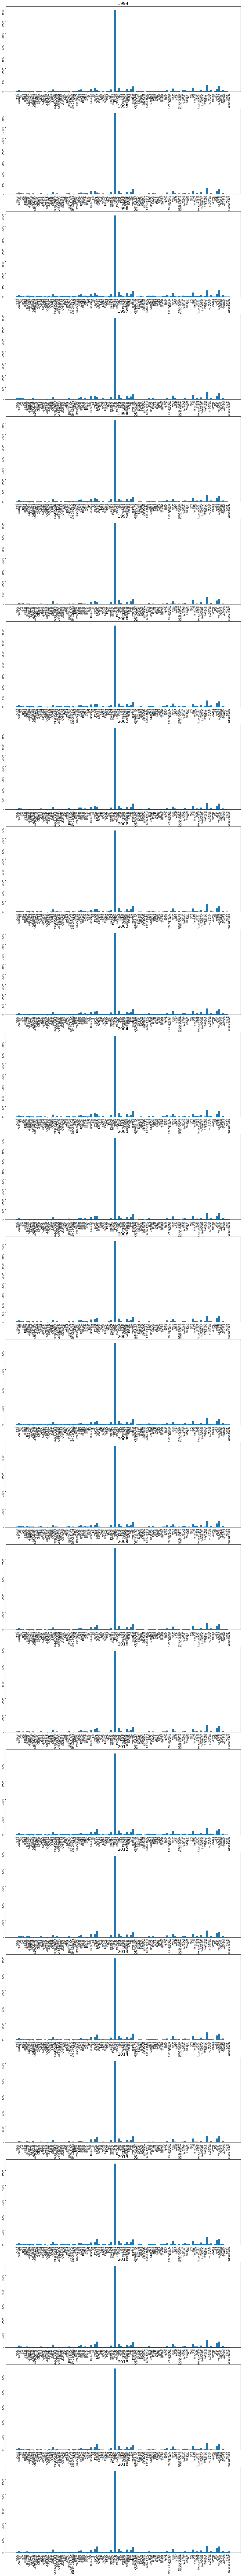

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(25, figsize=(18, 200))


axs = axs.ravel()
for i in range(25):
    labels =mortalidad.loc[mortalidad["año"] == (1994+i)]["desc_municipio"]
    values = mortalidad.loc[mortalidad["año"] == (1994+i)]["valor"]
    axs[i].bar(labels, values)
    axs[i].tick_params(labelrotation=90)
    axs[i].set_title((1994+i), size=18)

Como se puede observar Mérida hace que la gráfica no nos demuestre correctamente la distribucion de los municipios, asi que volveremos a graficar las defunciones por año, quitando el municipio de Mérida

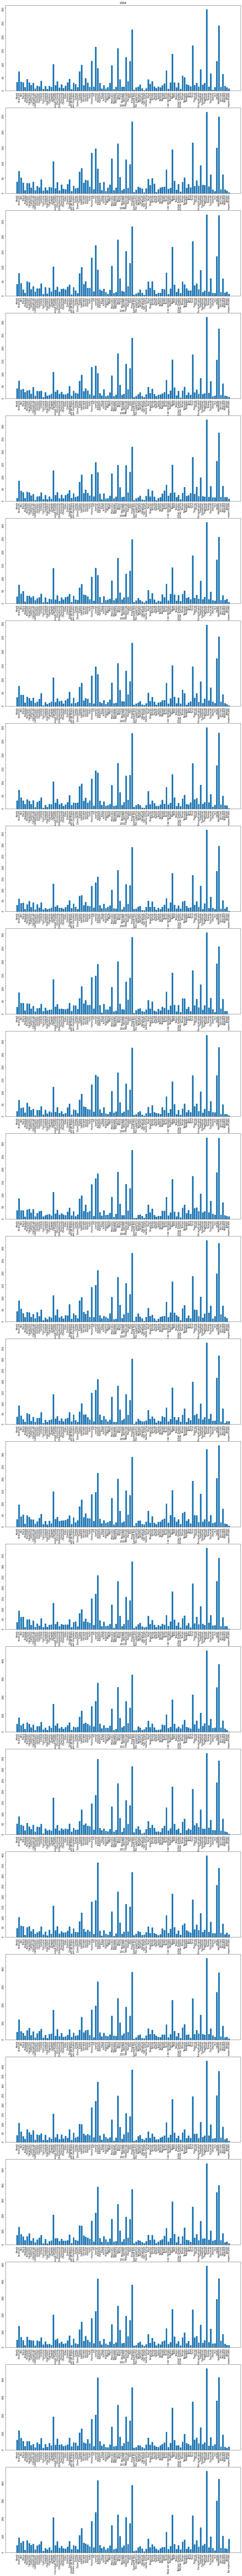

In [13]:

fig, axs = plt.subplots(25, figsize=(18, 200))

axs = axs.ravel()
for i in range(25):
    labels =mortalidad.loc[(mortalidad["año"] == (1994+i)) &(mortalidad["desc_municipio"] != "Mérida")]["desc_municipio"]
    values = mortalidad.loc[(mortalidad["año"] == (1994+i)) & ((mortalidad["desc_municipio"] != "Mérida"))]["valor"]

    axs[i].bar(labels, values)
    axs[i].tick_params(labelrotation=90)
    axs[i].set_title((1994+i))

A continuación se gráficaran los nacimientos en los municipios del Estado de Yucatán por año

In [ ]:
fig, axs = plt.subplots(26, figsize=(18, 200))

axs = axs.ravel()
for i in range(26):
    if(i == 0):
        labels = natalidad.loc[natalidad["año"] == 1990]["desc_municipio"]
        values = natalidad.loc[natalidad["año"] == 1990]["nacimientos"]
        axs[i].set_title((1990))
    else:
        labels = natalidad.loc[natalidad["año"] == (1993+i)]["desc_municipio"]
        values = natalidad.loc[natalidad["año"] == (1993+i)]["nacimientos"]
        axs[i].set_title((1993+i))
    axs[i].plot(labels, values)
    axs[i].tick_params(labelrotation=90)
    

Como se puede observar, Mérida hace que en nuestra gráfica no se aprecie correctamente los datos, asi  que procederemos a quitar al municipio de Mérida y volver a gráficar

In [ ]:
fig, axs = plt.subplots(26, figsize=(18, 200))

axs = axs.ravel()
for i in range(26):
    if(i == 0):
        labels = natalidad.loc[(natalidad["año"] == 1990) & (natalidad["desc_municipio"] != "Mérida")]["desc_municipio"]
        values = natalidad.loc[(natalidad["año"] == 1990) & (natalidad["desc_municipio"] != "Mérida")]["nacimientos"]
        axs[i].set_title((1990))
    else:
        labels = natalidad.loc[(natalidad["año"] == (1993+i)) & (natalidad["desc_municipio"] != "Mérida")]["desc_municipio"]
        values = natalidad.loc[(natalidad["año"] == (1993+i)) & (natalidad["desc_municipio"] != "Mérida")]["nacimientos"]
        axs[i].set_title((1993+i))
    axs[i].plot(labels, values)
    axs[i].tick_params(labelrotation=90)

Como se puede observar hay municipios aparte de Merida que podrian hacer ruido en un futuro dado a aque han tenido un crecimiento al nivel de una ciudad, estos municipios son:

<li>chemax

<li>Hunucma

<li>Kanasin

<li>Progreso

<li>Motul

<li>oxkutzcab

<li>Maxcanu

<li>Tekax

<li>Ticul

<li>Tizimin

<li>Valladolid

 ## Análisis Multivariado

### Técnicas de Estadísticas Descriptivas

In [ ]:
mortalidad.describe()

In [ ]:
mortalidad.info()

In [ ]:
natalidad.describe()

In [ ]:
natalidad.info()

In [ ]:
arr  = []
for i in range(len(mortalidad)):
    if(mortalidad["desc_municipio"][i] not in arr):
        arr.append(mortalidad["desc_municipio"][i])
    if(len(arr) == 107):
        break



In [ ]:
for i in range(len(arr)):
    print("===================",arr[i],"=============")
    print(mortalidad.loc[mortalidad["desc_municipio"] == arr[i]][["año","valor"]].corr())

In [ ]:
for i in range(len(arr)):
    print("=============",arr[i],"===============")
    print(natalidad.loc[natalidad["desc_municipio"] == arr[i]][["año","nacimientos"]].corr())

### Técnicas Gráficas

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import corrcoef, sqrt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
for i in range(len(arr)):
   pd.plotting.scatter_matrix(mortalidad.loc[mortalidad["desc_municipio"] == arr[i]][["año","valor"]], alpha=1.0, figsize=(10, 10),diagonal='hist')
   plt.suptitle(arr[i],fontsize=30,y=0.96)
   plt.show()


In [ ]:
for i in range(len(arr)):
   pd.plotting.scatter_matrix(natalidad.loc[natalidad["desc_municipio"] == arr[i]][["año","nacimientos"]], alpha=1.0, figsize=(10, 10),diagonal='hist')
   plt.suptitle(arr[i],fontsize=30,y=0.96)
   plt.show()

In [ ]:
mortalidad.shape, natalidad.shape

In [ ]:
natalidad.loc[natalidad.año == 1990]

In [ ]:
index = natalidad.loc[(natalidad.año == 1990)]
index


In [ ]:
for i in range(len(index)):
    natalidad.drop(i, inplace=True)

In [ ]:
mortalidad.shape, natalidad.shape

In [ ]:
dataMorNa= mortalidad.copy()

dataMorNa['nacimientos'] = natalidad['nacimientos'].dropna().reset_index(drop=True)
dataMorNa

In [ ]:
for i in range(len(arr)):
    print("=============",arr[i],"===============")
    print(dataMorNa.loc[dataMorNa["desc_municipio"] == arr[i]][["año","nacimientos","valor"]].corr())

In [ ]:
for i in range(len(arr)):
   pd.plotting.scatter_matrix(dataMorNa.loc[dataMorNa["desc_municipio"] == arr[i]][["año","nacimientos","valor"]], alpha=1.0, figsize=(10, 10),diagonal='hist')
   plt.suptitle(arr[i],fontsize=30,y=0.96)
   plt.show()

In [ ]:
#geoPandas
!pip install git+git://github.com/geopandas/geopandas.git

In [ ]:
import geopandas as gpd

In [ ]:
copiaMortalidad = mortalidad.copy()
copiaMortalidad = copiaMortalidad.loc[(copiaMortalidad['año'] == 1994) | (copiaMortalidad['año'] == 2018)]
copiaMortalidad

# Preprocesamiento

# Modelado y Evaluación